<a href="https://colab.research.google.com/github/Nickel777/ITSP200/blob/master/TF2_0_Long_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.4.1


In [3]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
#   y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [6]:
# Try a linear model first - note: it is classification now!
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the network
r = model.fit(
  X, Y,
  epochs=100,
  validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 3s 7ms/step - loss: 0.7450 - accuracy: 0.5648 - val_loss: 0.6120 - val_accuracy: 0.6376
Epoch 2/100
79/79 [==============================] - 0s 3ms/step - loss: 0.5941 - accuracy: 0.6498 - val_loss: 0.5971 - val_accuracy: 0.6328
Epoch 3/100
79/79 [==============================] - 0s 3ms/step - loss: 0.5874 - accuracy: 0.6517 - val_loss: 0.5975 - val_accuracy: 0.6384
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.6537 - val_loss: 0.5981 - val_accuracy: 0.6396
Epoch 5/100
79/79 [==============================] - 0s 3ms/step - loss: 0.5978 - accuracy: 0.6440 - val_loss: 0.5986 - val_accuracy: 0.6408
Epoch 6/100
79/79 [==============================] - 0s 3ms/step - loss: 0.5905 - accuracy: 0.6445 - val_loss: 0.5979 - val_accuracy: 0.6372
Epoch 7/100
79/79 [==============================] - 0s 3ms/step - loss: 0.5783 - accuracy: 0.6570 - val_loss: 0.5976 - val_accuracy: 0.6408
Epoch 8/100
7

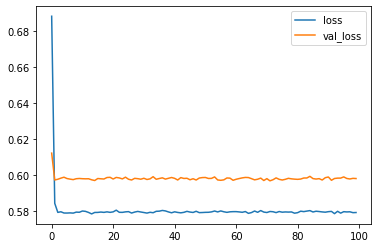

In [7]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

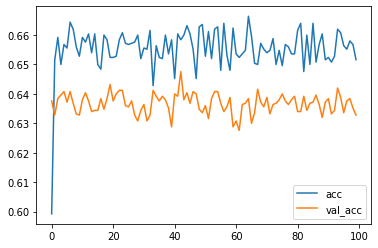

In [8]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [9]:
# Now try a simple RNN
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
#   optimizer='adam',
  optimizer=Adam(lr=0.01),
  # optimizer=SGD(lr=0.1, momentum=0.9),
  metrics=['accuracy'],
)

In [10]:
# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 11ms/step - loss: 0.6391 - accuracy: 0.5791 - val_loss: 0.5724 - val_accuracy: 0.6924
Epoch 2/200
79/79 [==============================] - 1s 9ms/step - loss: 0.5425 - accuracy: 0.7118 - val_loss: 0.5023 - val_accuracy: 0.7252
Epoch 3/200
79/79 [==============================] - 1s 10ms/step - loss: 0.4619 - accuracy: 0.7696 - val_loss: 0.4340 - val_accuracy: 0.7832
Epoch 4/200
79/79 [==============================] - 1s 9ms/step - loss: 0.3970 - accuracy: 0.8113 - val_loss: 0.3772 - val_accuracy: 0.8368
Epoch 5/200
79/79 [==============================] - 1s 10ms/step - loss: 0.3540 - accuracy: 0.8474 - val_loss: 0.3357 - val_accuracy: 0.8644
Epoch 6/200
79/79 [==============================] - 1s 9ms/step - loss: 0.3306 - accuracy: 0.8762 - val_loss: 0.3064 - val_accuracy: 0.8800
Epoch 7/200
79/79 [==============================] - 1s 10ms/step - loss: 0.2870 - accuracy: 0.9019 - val_loss: 0.2854 - val_accuracy: 0.8992
Epoch 8/2

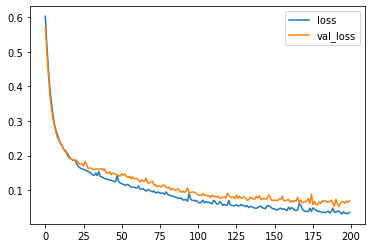

In [11]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

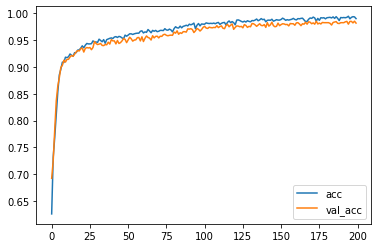

In [12]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [13]:
# Now change to the long distance problem

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [14]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 11ms/step - loss: 0.7208 - accuracy: 0.5700 - val_loss: 0.6547 - val_accuracy: 0.6324
Epoch 2/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6488 - accuracy: 0.6403 - val_loss: 0.6500 - val_accuracy: 0.6376
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6527 - accuracy: 0.6453 - val_loss: 0.6308 - val_accuracy: 0.6744
Epoch 4/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6467 - accuracy: 0.6491 - val_loss: 0.6379 - val_accuracy: 0.6636
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6339 - accuracy: 0.6722 - val_loss: 0.6384 - val_accuracy: 0.6624
Epoch 6/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6443 - accuracy: 0.6535 - val_loss: 0.6508 - val_accuracy: 0.6460
Epoch 7/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6465 - accuracy: 0.6522 - val_loss: 0.6281 - val_accuracy: 0.6792
Epoch 8/200


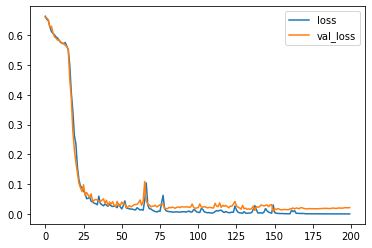

In [21]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

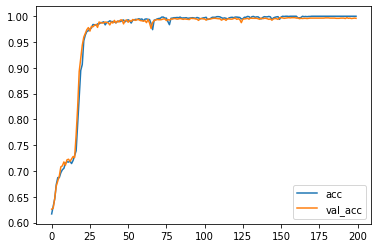

In [22]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [17]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 6s 9ms/step - loss: 0.6750 - accuracy: 0.5990 - val_loss: 0.6601 - val_accuracy: 0.6260
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6579 - accuracy: 0.6218 - val_loss: 0.6582 - val_accuracy: 0.6280
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6573 - accuracy: 0.6343 - val_loss: 0.6521 - val_accuracy: 0.6468
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6303 - accuracy: 0.6707 - val_loss: 0.6261 - val_accuracy: 0.6708
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6256 - accuracy: 0.6688 - val_loss: 0.6310 - val_accuracy: 0.6804
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.5855 - accuracy: 0.7130 - val_loss: 0.6095 - val_accuracy: 0.6904
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.5947 - accuracy: 0.7095 - val_loss: 0.5950 - val_accuracy: 0.7080
Epoch 8/200
7

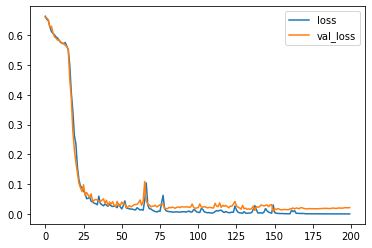

In [23]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

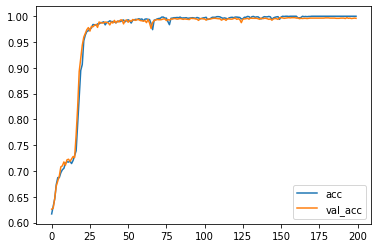

In [24]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [25]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [26]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 17ms/step - loss: 0.6895 - accuracy: 0.5811 - val_loss: 0.6642 - val_accuracy: 0.6208
Epoch 2/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6548 - accuracy: 0.6377 - val_loss: 0.6670 - val_accuracy: 0.6212
Epoch 3/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6646 - accuracy: 0.6227 - val_loss: 0.6671 - val_accuracy: 0.6212
Epoch 4/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6653 - accuracy: 0.6243 - val_loss: 0.6648 - val_accuracy: 0.6212
Epoch 5/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6631 - accuracy: 0.6260 - val_loss: 0.6674 - val_accuracy: 0.6212
Epoch 6/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6592 - accuracy: 0.6324 - val_loss: 0.6643 - val_accuracy: 0.6212
Epoch 7/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6547 - accuracy: 0.6395 - val_loss: 0.6647 - val_accuracy: 0.6212
Epoch 

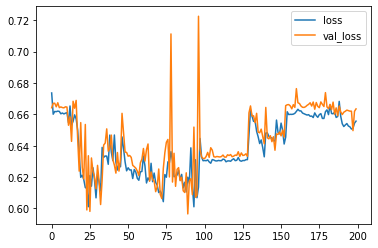

In [27]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

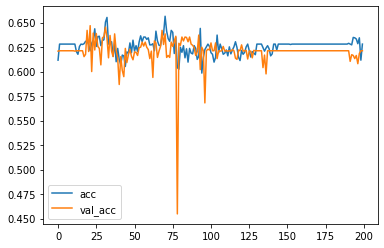

In [28]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [29]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 10ms/step - loss: 0.6734 - accuracy: 0.5981 - val_loss: 0.6624 - val_accuracy: 0.6212
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6633 - accuracy: 0.6224 - val_loss: 0.6630 - val_accuracy: 0.6212
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6647 - accuracy: 0.6209 - val_loss: 0.6629 - val_accuracy: 0.6212
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6579 - accuracy: 0.6291 - val_loss: 0.6615 - val_accuracy: 0.6212
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6426 - val_loss: 0.6610 - val_accuracy: 0.6212
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6547 - accuracy: 0.6326 - val_loss: 0.6558 - val_accuracy: 0.6212
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6486 - accuracy: 0.6213 - val_loss: 0.6410 - val_accuracy: 0.6488
Epoch 8/200


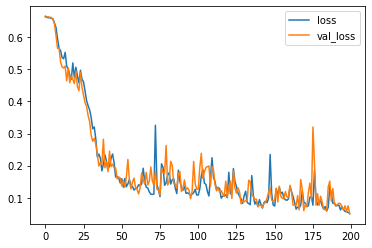

In [30]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

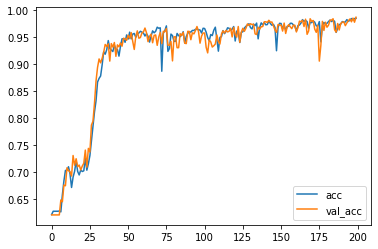

In [31]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [32]:
# Now test our GRU
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = GRU(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 2s 9ms/step - loss: 0.6701 - accuracy: 0.6197 - val_loss: 0.6651 - val_accuracy: 0.6212
Epoch 2/400
79/79 [==============================] - 0s 5ms/step - loss: 0.6592 - accuracy: 0.6346 - val_loss: 0.6642 - val_accuracy: 0.6212
Epoch 3/400
79/79 [==============================] - 0s 5ms/step - loss: 0.6641 - accuracy: 0.6230 - val_loss: 0.6631 - val_accuracy: 0.6212
Epoch 4/400
79/79 [==============================] - 0s 5ms/step - loss: 0.6597 - accuracy: 0.6306 - val_loss: 0.6634 - val_accuracy: 0.6212
Epoch 5/400
79/79 [==============================] - 0s 5ms/step - loss: 0.6559 - accuracy: 0.6349 - val_loss: 0.6649 - val_accuracy: 0.6212
Epoch 6/400
79/79 [==============================] - 0s 5ms/step - loss: 0.6637 - accuracy: 0.6202 - val_loss: 0.6651 - val_accuracy: 0.6212
Epoch 7/400
79/79 [==============================] - 0s 5ms/step - loss: 0.6631 - accuracy: 0.6261 - val_loss: 0.6636 - val_accuracy: 0.6212
Epoch 8/400
7

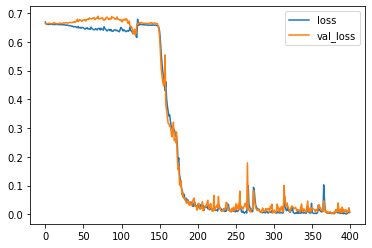

In [33]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

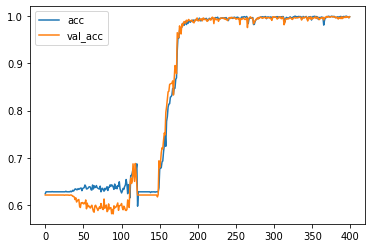

In [34]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [35]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [36]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(15)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 2s 10ms/step - loss: 0.6782 - accuracy: 0.6012 - val_loss: 0.6635 - val_accuracy: 0.6368
Epoch 2/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6759 - accuracy: 0.5951 - val_loss: 0.6564 - val_accuracy: 0.6368
Epoch 3/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6706 - accuracy: 0.6079 - val_loss: 0.6558 - val_accuracy: 0.6368
Epoch 4/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6700 - accuracy: 0.6077 - val_loss: 0.6573 - val_accuracy: 0.6368
Epoch 5/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6677 - accuracy: 0.6101 - val_loss: 0.6596 - val_accuracy: 0.6368
Epoch 6/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6707 - accuracy: 0.6063 - val_loss: 0.6574 - val_accuracy: 0.6368
Epoch 7/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6663 - accuracy: 0.6118 - val_loss: 0.6577 - val_accuracy: 0.6368
Epoch 8/400


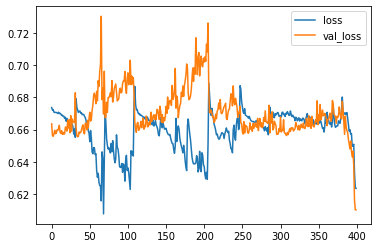

In [37]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

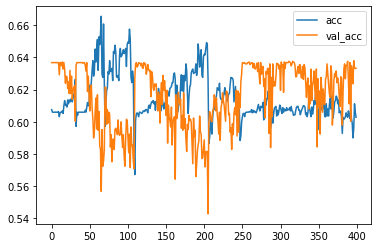

In [38]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [5]:
# Now try a LSTM with Global Max Pooling
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=100,
  validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 9s 13ms/step - loss: 0.6739 - accuracy: 0.5783 - val_loss: 0.6629 - val_accuracy: 0.6108
Epoch 2/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6629 - accuracy: 0.6170 - val_loss: 0.6590 - val_accuracy: 0.6108
Epoch 3/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6540 - accuracy: 0.6185 - val_loss: 0.6459 - val_accuracy: 0.6108
Epoch 4/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6358 - accuracy: 0.6386 - val_loss: 0.6490 - val_accuracy: 0.6104
Epoch 5/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6384 - accuracy: 0.6277 - val_loss: 0.6258 - val_accuracy: 0.6096
Epoch 6/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6221 - accuracy: 0.6191 - val_loss: 0.6125 - val_accuracy: 0.6200
Epoch 7/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6299 - accuracy: 0.6045 - val_loss: 0.6067 - val_accuracy: 0.6136
Epoch 8/100


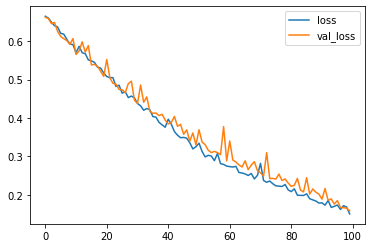

In [6]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

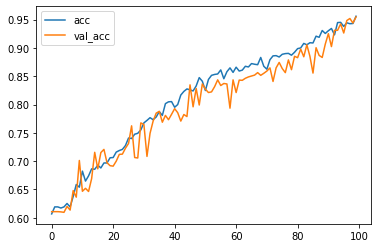

In [7]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()